<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/altmann2010_poroelasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Radius to reservoir from wellbore ranging from 0 to 500 m, in a sandstone reservoir

The undrained (saturated) bulk modulus: 17.060676478182287 GPa
The Biot-Willis coefficient: 0.7
Stress path at infinite time and infinite reservoir: 0.3982758620689654 

Diffusivity: 0.08352374587295491 m2/s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in multiply


(0.0, 1.5)

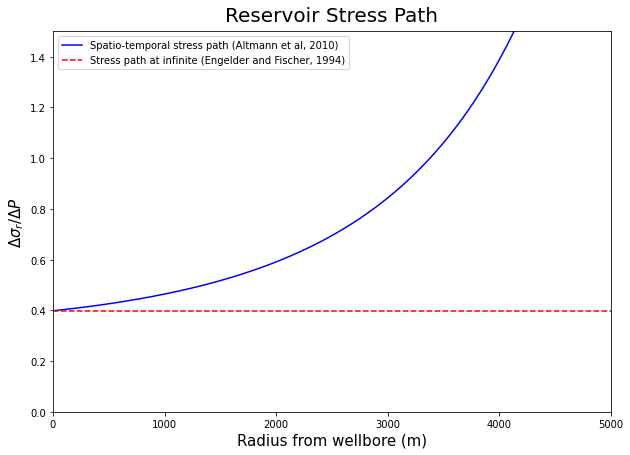

In [ ]:
r = np.arange(0, 5010, 10) # radius, m
year = 1
t = year * (3.154E+7) # time, seconds in year

# knowns from Altmann paper

Kd = 12 # drained bulk modulus, GPa
Kg = 40 # grain bulk modulus, GPa
G = 5.5 # shear modulus, GPa
Kf = 2 # fluid bulk modulus, GPa
rhof = 1000 # fluid density, kg/m3
poro = 0.167 # porosity of sandstone
g = 9.8 # gravitational acceleration, m/s2
kf = 0.1E-6 # hydraulic conductivity, m/s

# Gassmann fluid substitution, according to Altmann
Ku = (Kg + (Kd * (poro * (Kg / Kf) - poro - 1))) / (1 - poro - (Kd / Kg) + (poro * (Kg / Kf)))
print('The undrained (saturated) bulk modulus:', Ku, 'GPa')

# Biot-Willis coeff
alpha = 1 - (Kd / Kg)
print('The Biot-Willis coefficient:', alpha)

# Lame parameter lambda
lame_lambda = Kd - (2 * G / 3)

# undrained Lame parameter lambda
lame_lambda_u = Ku - (2 * G / 3)

# stress path defined by Engelder & Fischer (1994), assume infinite reservoir
v = lame_lambda / (3 * Kd - lame_lambda)
sp = alpha * ((1 - 2 * v) / (1 - v))
print('Stress path at infinite time and infinite reservoir:', sp, '\n')

# diffusivity
k = kf / (g * rhof)
numerator = (lame_lambda_u - lame_lambda) * (lame_lambda + 2 * G)
denominator = (alpha**2) * (lame_lambda_u + 2 * G)
c = k * ((numerator / denominator) * 1E+9) # GPa to Pa, multiply by 1E+9
print('Diffusivity:', c, 'm2/s')

# boltzmann variable (dimensionless)
boltz = r / np.sqrt(c * t)

# error function
errf = scipy.special.erf(0.5 * boltz)
errfc = 1 - errf
g_func = errf - ((1 / np.sqrt(np.pi)) * boltz * np.exp(-0.25 * (boltz**2)))

# spatio-temporal radial stress path
A = (2 * alpha * G) / (lame_lambda + 2 * G)
B = 1 + ( ((2 / boltz**2) * g_func) / (errfc) )

stress_path_radial = A * B

# plot stress path
plt.figure(figsize=(10,7))
p1 = plt.plot(r, stress_path_radial, color='blue')
p2 = plt.plot([0, max(r)], [sp, sp], '--', color='red')
plt.legend((p1[0], p2[0]), (['Spatio-temporal stress path (Altmann et al, 2010)', 'Stress path at infinite (Engelder and Fischer, 1994)']))
plt.title('Reservoir Stress Path', size=20, pad=10)
plt.xlabel('Radius from wellbore (m)', size=15)
plt.ylabel('$\Delta \sigma_r / \Delta P$', size=15)
plt.xlim(0, max(r))
plt.ylim(0, 1.5)